# Lire des données financières

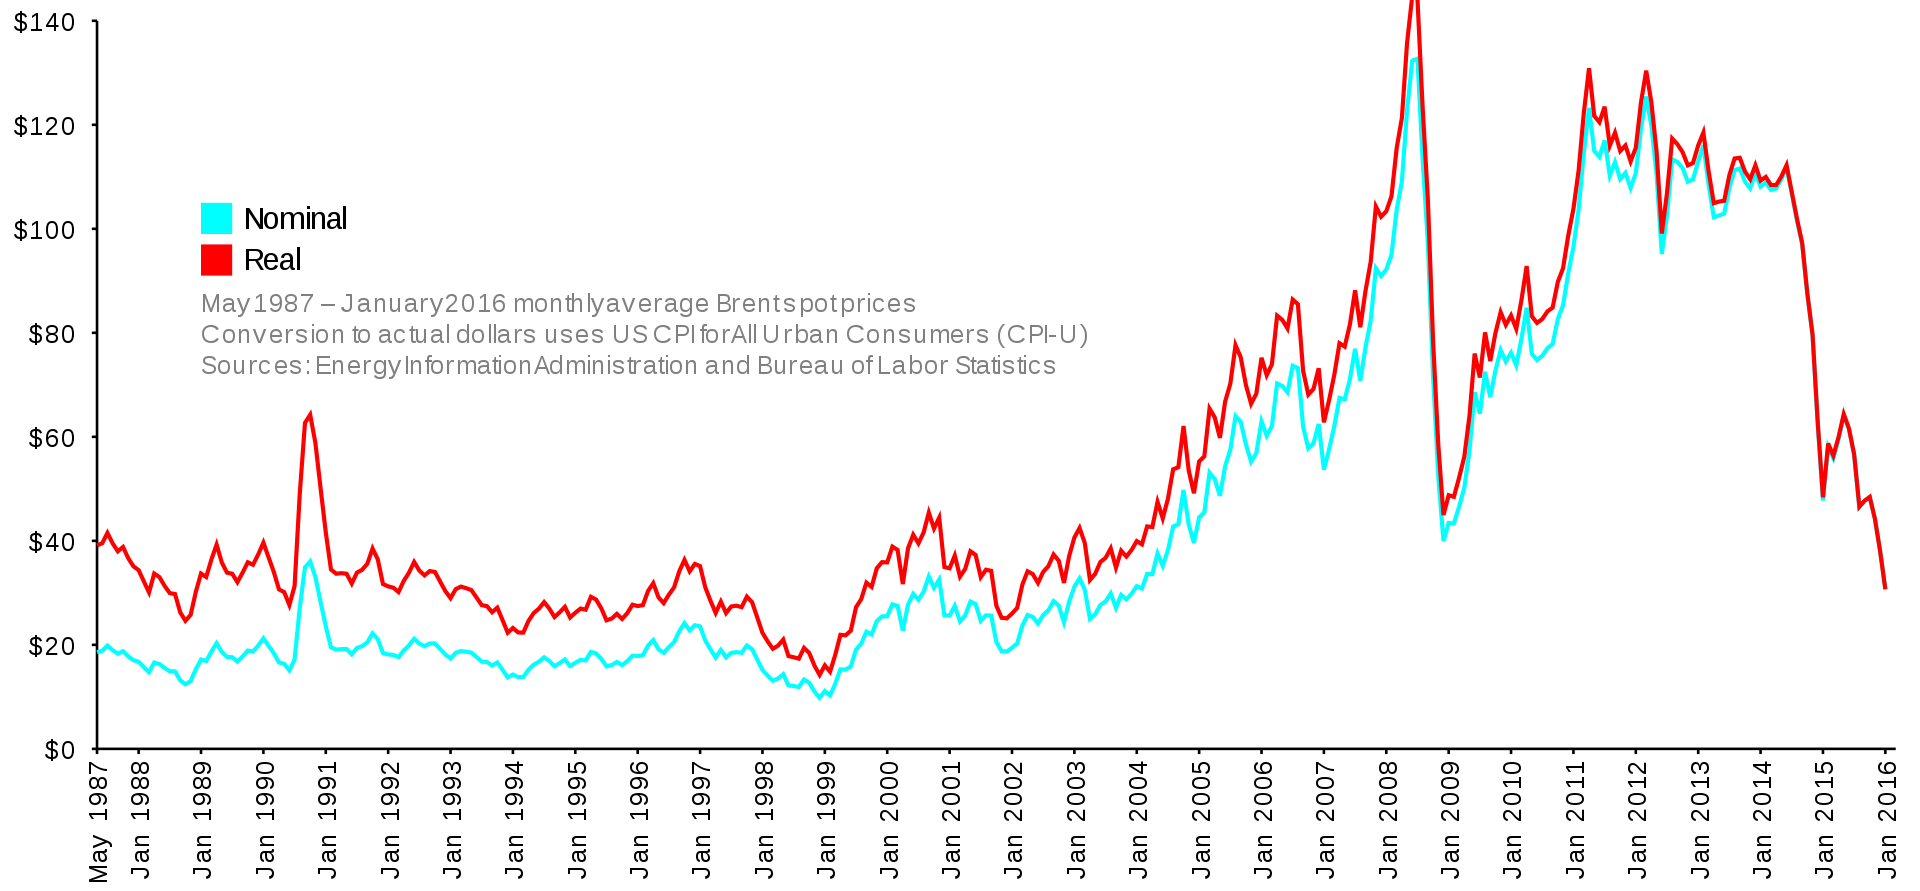

Aujourd'hui, grâce à la performance des ordinateurs et leurs puissance de calcul qui ne cesse d'augmenter il est facile de traiter une quantité phénoménale des données brutes en très peu de temps. Le traitement et l'extraction d'informations à partir de ces données en temps réel deviennent décisifs à mesure que croissent les enjeux associés à l'utilisation d'une information.  Presque toutes les grosses entreprises de la planète sont aujourd'hui côtées en bourse: que ce soit Facebook, Google, Amazon ou encore Apple pour ne citer que ces populaires là, les informations les concernant doivent être disponibles ainsi que les prédictions associées pour aider les acteurs des marchés financiers à se décider.  
Dans cet article, j'aimerais vous emmener un peu à l'aventure de traitement des données en passant premièrement à leur lecture en ligne, à la visualisation et à l'analyse. Allons-y

# La librairie `pandas_datareader`.   
Python a cet avantage qu'il existe beaucoup de librairies permettant de lire en temps réel les données financières. `Pandas_datareader`, `Quantopian` ou bien `Quandl` ne sont que quelques une des librairies qui permettent de faire ce travail. J'utiliserais cette première librairie pour cet article car elle est facile et fonctionne très bien avec Pandas.

In [1]:
# Importation des librairies
% matplotlib inline
import pandas as pd
from pandas_datareader import DataReader, wb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Paramètres graphiques
plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.dpi"] = 150
plt.style.use("fivethirtyeight")

Les librairies importées, passons maintenant à la lecture des informations financières. J'aimerais lire les informations de 3 informations. Une française, une américaine et une autre japonaise.  
Ces entreprises ne sont rien d'autres que Total, Amazon et Toyota.  
J'aimerais avoir leurs informations boursières d'il y a 10 ans à aujourd'hui 25 février 2019

In [3]:
total = DataReader("TOT", data_source= "yahoo", start= "2009-02-25", end= "2019-02-25")
amazon = DataReader("AMZN", data_source= "yahoo", start= "2009-02-25", end= "2019-02-25")
toyota = DataReader("TYO", data_source= "yahoo", start= "2009-02-25", end= "2019-02-25")

J'ai décidé de lire les informations à partir de Yahoo Finance. Chaque entreprise côtée en bourse a ce qu'on applle un 'ticker', c'est le premier argument que j'ai rentré dans la fonction `DataReader` : pour Total c'est **TOT**, Amazon, **AMZN** et Toyota, **TYO**. La liste de ces tickers est en ligne, si vous voulez trouver une entreprise particulière il faut juste taper sur Google , ticker "nom de l'entreprise".   
Maintenant, regardons comment se présente chacune de ces données. 

In [4]:
total.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-02-25,49.730000,47.450001,49.000000,48.900002,5140800.0,28.170866
2009-02-26,48.959999,47.759998,48.160000,47.910000,4680700.0,27.600544
2009-02-27,48.360001,46.349998,46.759998,47.200001,3990300.0,27.191511
2009-03-02,46.189999,43.599998,45.810001,43.720001,4412600.0,25.186716
2009-03-03,44.680000,42.880001,44.680000,43.410000,3934000.0,25.008127


Pour chacune des entreprises ce sont ces informations que nous avons pour toute la période:   
La date est lue comme l'index de la base de donnée, et le grand avantage c'est qu'on a une donnée Pandas donc on peut utiliser toute la librairie pour analyser et extraire de l'information à partir d'elle.  
Les colonnes High et Low représentent le prix le plus haut de l'action au jour.  Open et Close sont les prix d'ouverture et de fermture ce même jour. 
Volume représente la quantité totale d'actions échangée échangée le jour. 

Pour pouvoir analyser ensemble ces données concernant les 3 entreprises on peut les joindre ensemble dans un seul base de donnée. 

In [5]:
tickers = ["TOT", "AMZN", "TYO"]

In [6]:
entreprises = pd.concat([total, amazon, toyota], axis = 1, keys= tickers)

In [7]:
entreprises.head()

TOT                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2009-02-25  49.730000  47.450001  49.000000  48.900002  5140800.0  28.170866   
2009-02-26  48.959999  47.759998  48.160000  47.910000  4680700.0  27.600544   
2009-02-27  48.360001  46.349998  46.759998  47.200001  3990300.0  27.191511   
2009-03-02  46.189999  43.599998  45.810001  43.720001  4412600.0  25.186716   
2009-03-03  44.680000  42.880001  44.680000  43.410000  3934000.0  25.008127   

                 AMZN                                                        \
                 High        Low       Open      Close    Volume  Adj Close   
Date                                                                          
2009-02-25  65.750000  62.820000  64.900002  63.709999   9122100  63.709999   
2009-02-26  64.730003  62.340000  64.120003  62.340000   7275300  62.340000   
2009-02-27  65.080002  60.939999  61.259998  64.790001  11488300  64.790001   
2009-03-02  65.519997  61.509998  63.939999  61.990002  10511900  61.990002   
2009-03-03  63.290001  61.299999  62.750000  61.700001   9691600  61.700001   

            TYO                                  
           High Low Open Close Volume Adj Close  
Date                                             
2009-02-25  NaN NaN  NaN   NaN    NaN       NaN  
2009-02-26  NaN NaN  NaN   NaN    NaN       NaN  
2009-02-27  NaN NaN  NaN   NaN    NaN       NaN  
2009-03-02  NaN NaN  NaN   NaN    NaN       NaN  
2009-03-03  NaN NaN  NaN   NaN    NaN       NaN

En combinant les informations ensemble, on observe toute de suite que les données concernant Toyota en 2009 sont manquantes. Il semblerait donc que le groupe n'ait entré e bourse que plus tard. Regardons à partir de quel moment nous avons les informations le concernant.

In [8]:
entreprises["TYO"]["Open"].first_valid_index()

Timestamp('2009-04-16 00:00:00')

C'est donc à partir du 16 avril 2009 qu'on commence à trouver des informations disponibles concernant Toyota.

# Visualisation
## Evolution des prix plus haut

In [9]:
tickers

['TOT', 'AMZN', 'TYO']

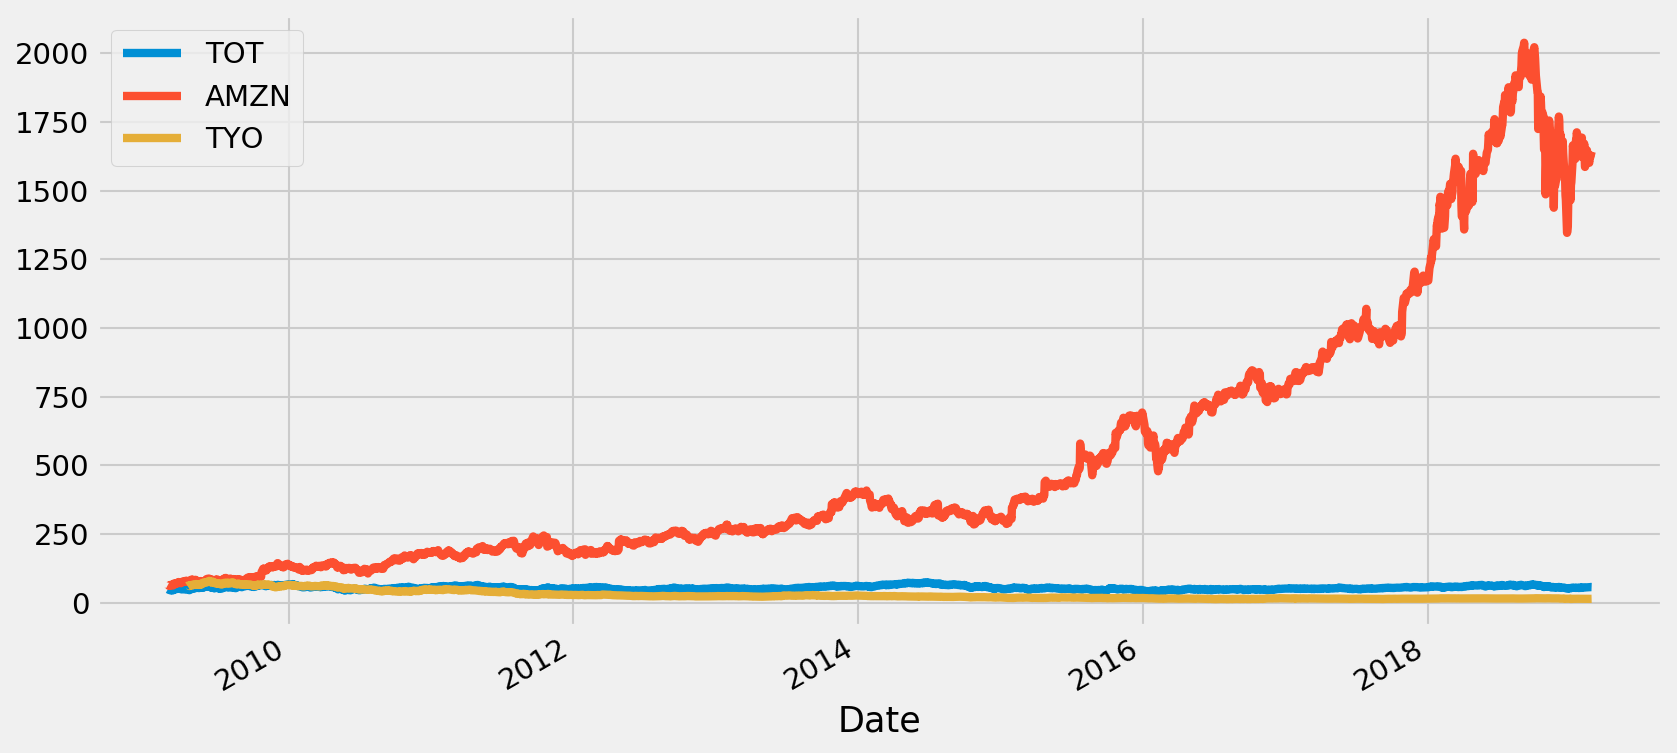

In [10]:
for i, tick in enumerate(tickers):
    entreprises[tick]["Open"].plot()
    plt.legend(tickers)

La croissance des prix d'ouverture des actions Amazon est tellement fulgurante que sur l'echelle les deux autres prix sont mal représentés.  
On peut zoomer sur ce graphique en ajustant l'echelle à un echelle logarithmique pour observer l'évolution des données avec le temps.

In [11]:
import numpy as np

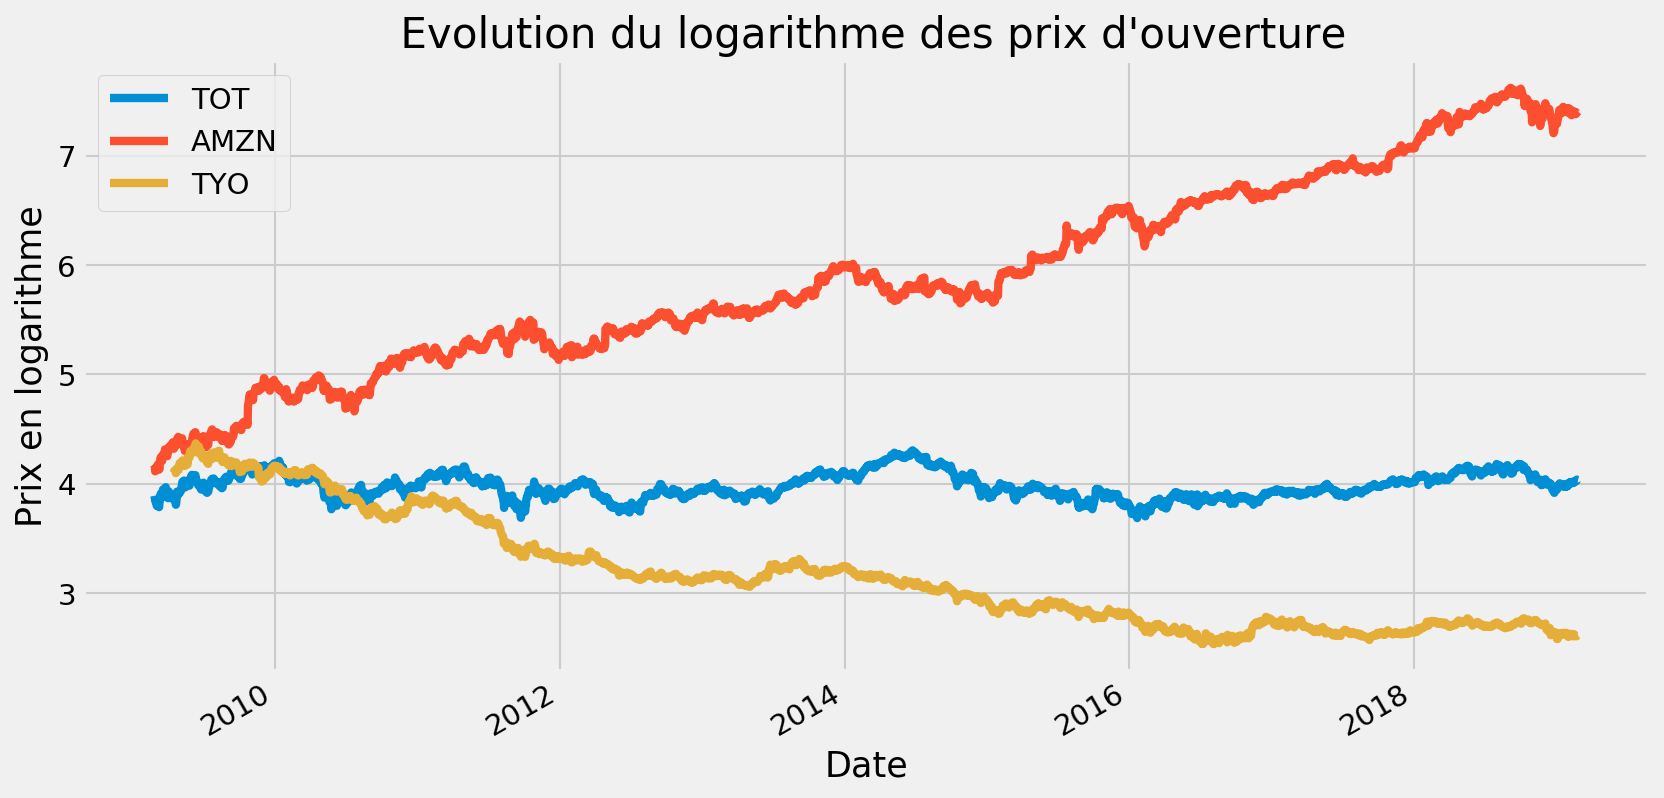

In [12]:
for i, tick in enumerate(tickers):
    np.log(entreprises[tick]["Open"]).plot()
    plt.legend(tickers)
plt.title(" Evolution du logarithme des prix d'ouverture")
plt.ylabel("Prix en logarithme");

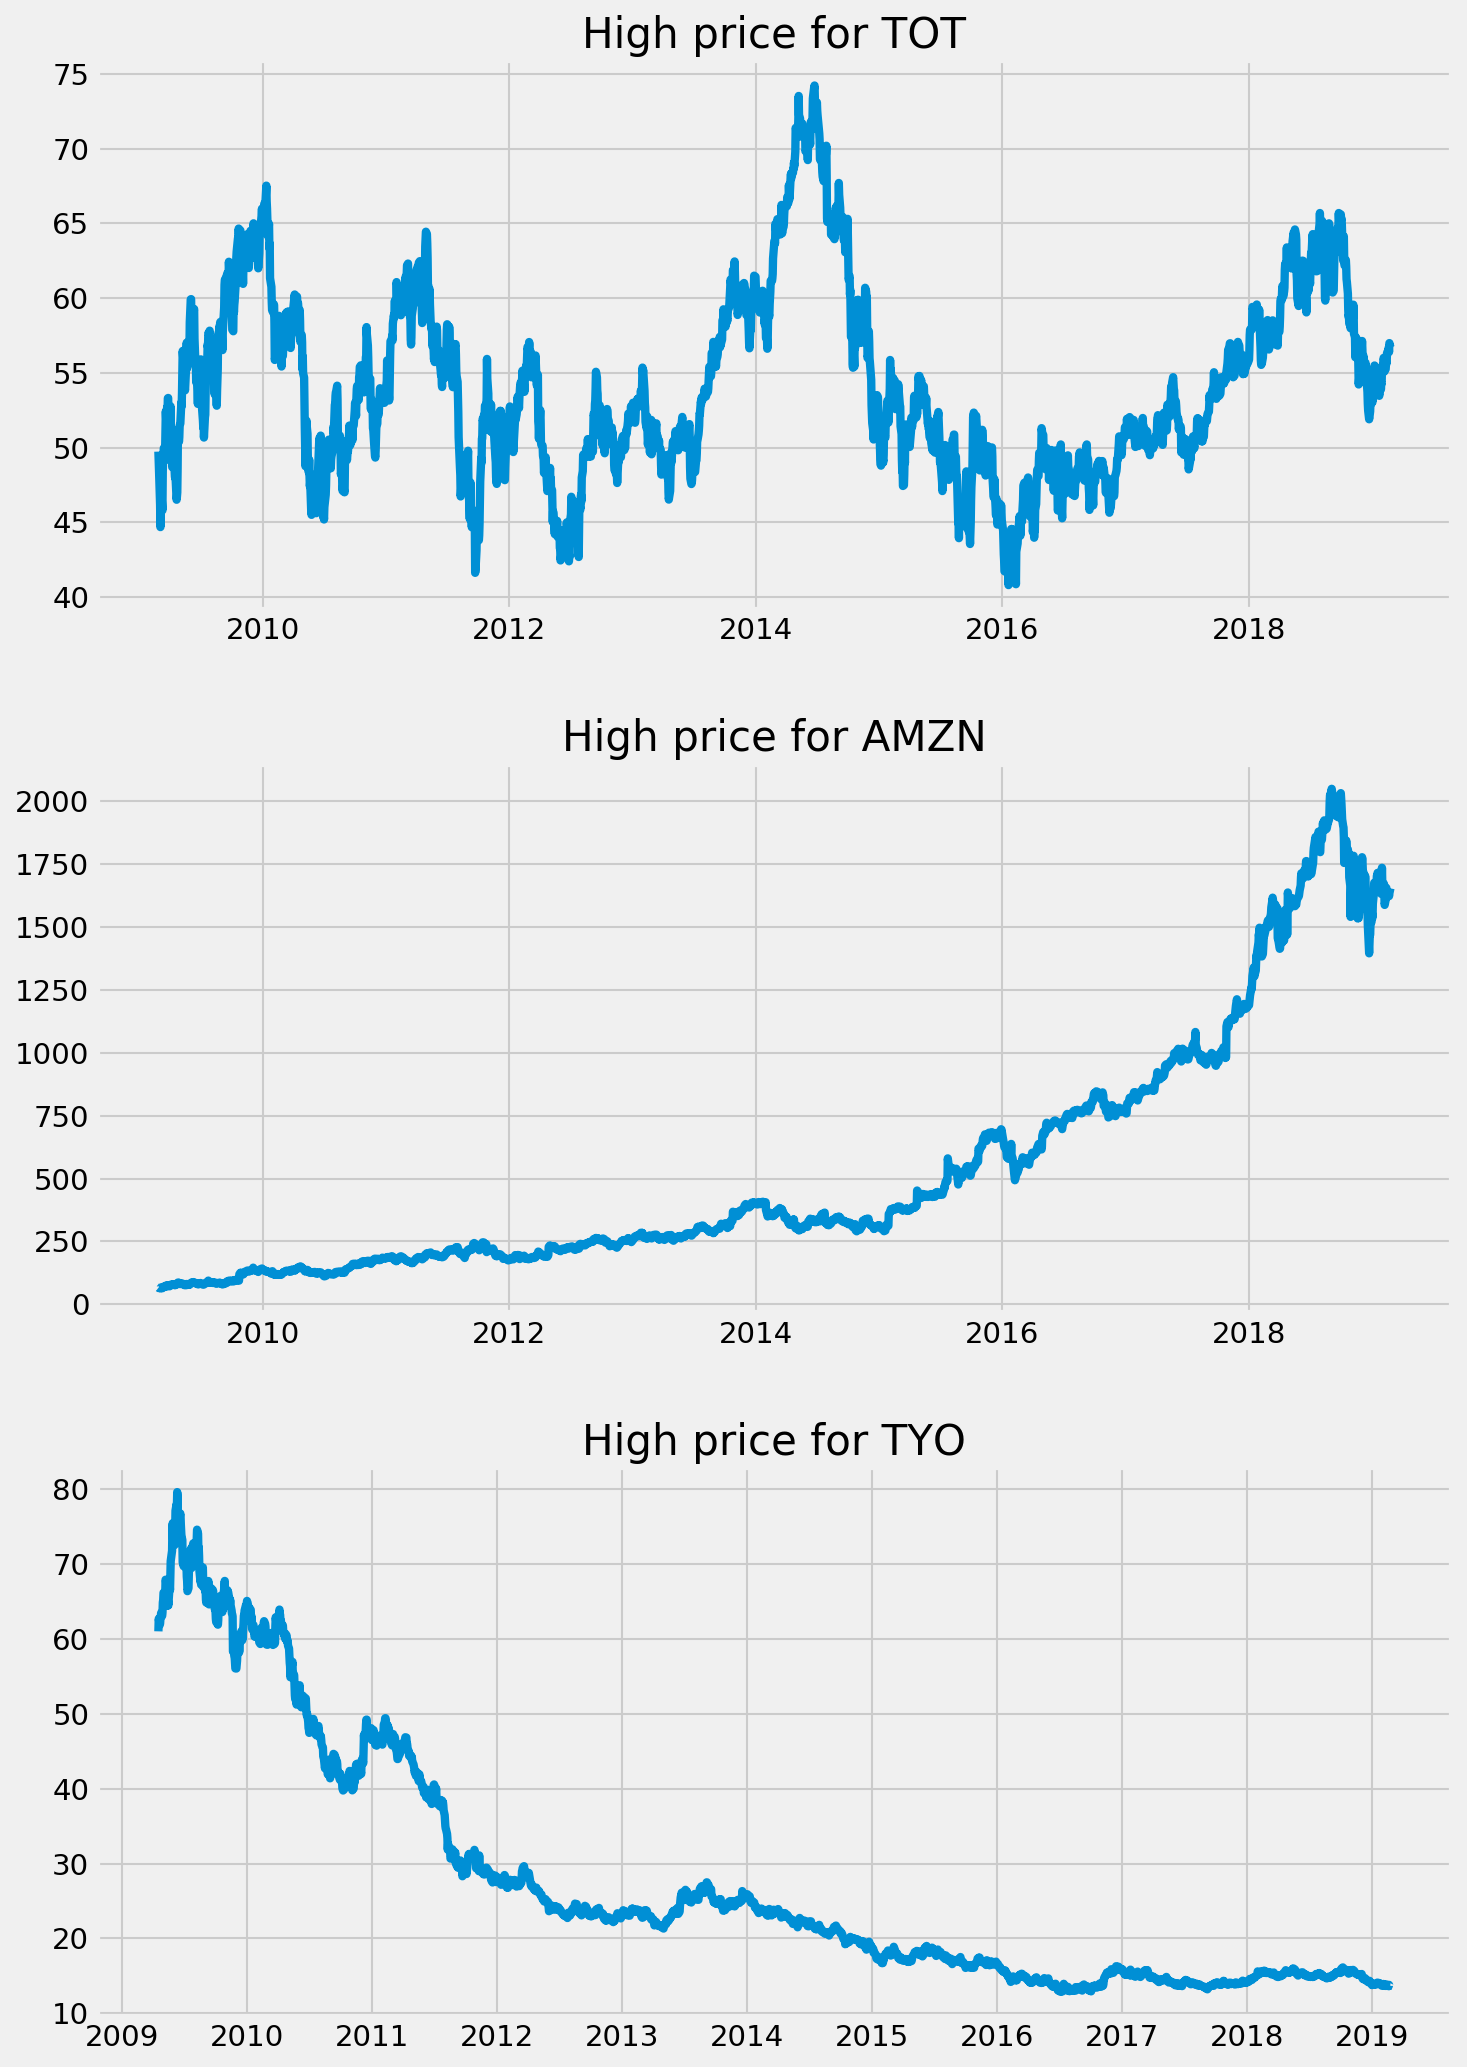

In [13]:
plt.figure(figsize = (10,14))
for i, tick in enumerate(tickers):
    plt.subplot(3,1, i+1)
    plt.plot(entreprises[tick]["High"])
    plt.title(f"High price for {tick}")
plt.tight_layout(h_pad = 2.5)

On observe pour ces trois entreprises que les variations des prix des actions diffèrent considérablement. Chez Total on observe une forte volatilité et une sorte de saisonalité, chez Amazon c'est une croissance fulgurante qu'on observe, depuis 2009 les prix ne cessent de grimper jusqu'à atteindre leur maximum mi 2018 pour baisser légrement ensuite. Quand à Toyota sur toute la période les prix ne font que baisser. Essayons de zoomer davantage sur ces données et considérons un horizon temporelle plus court : entre 2015 et 2019.

## A partir de 2015

In [14]:
from_2015 = entreprises.loc["2015":,]

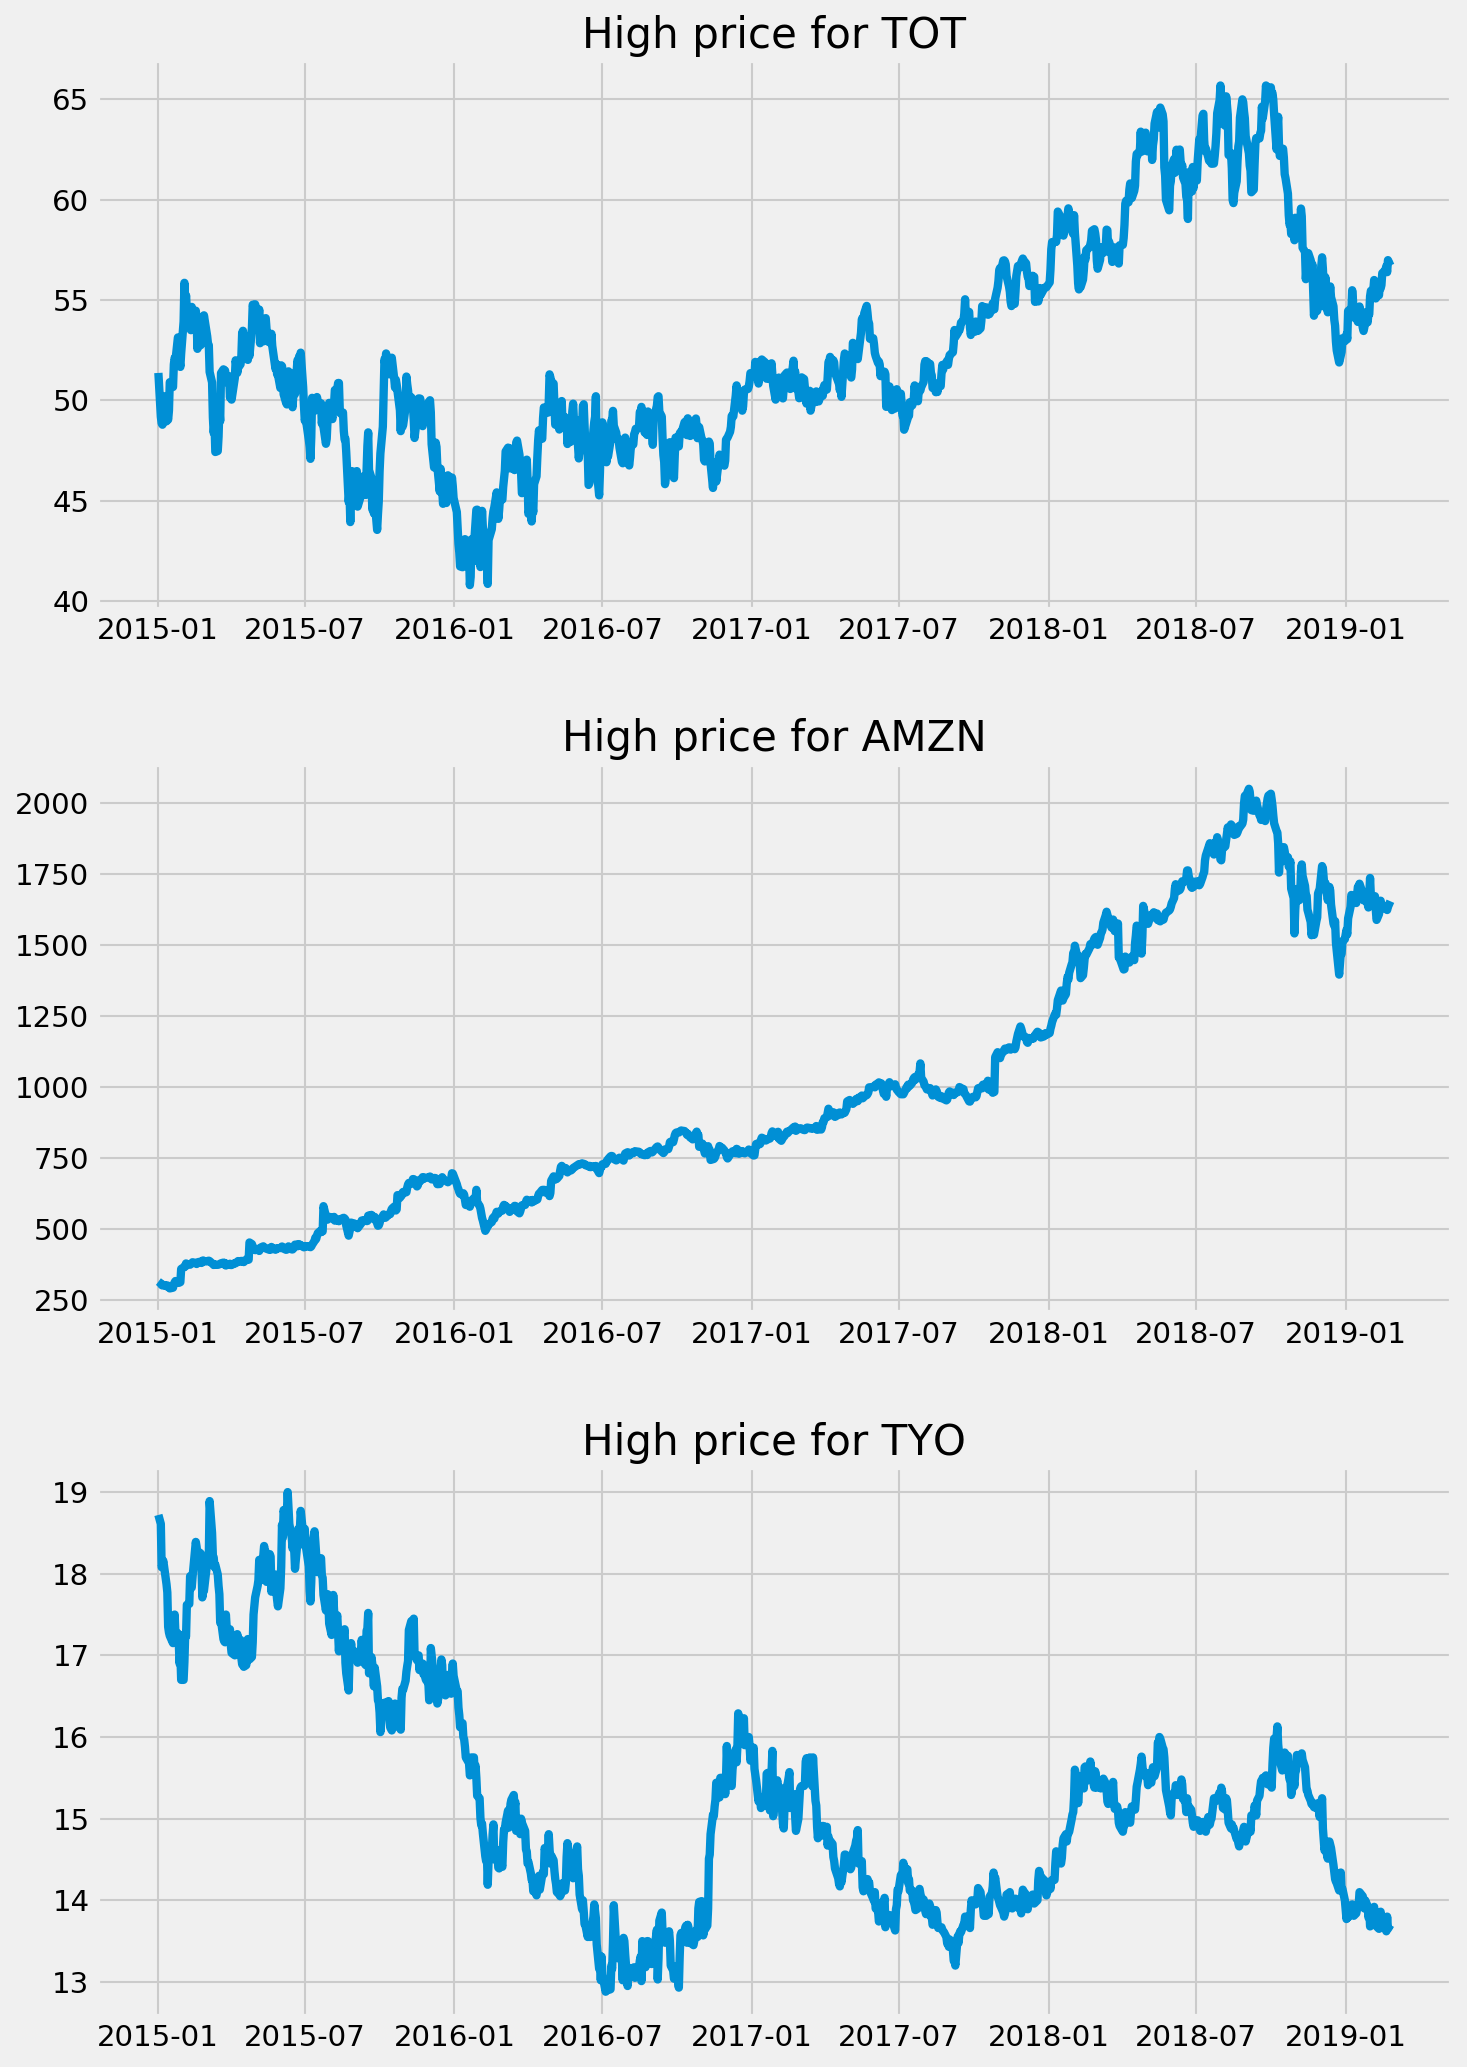

In [15]:
plt.figure(figsize = (10,14))
for i, tick in enumerate(tickers):
    plt.subplot(3,1, i+1)
    plt.plot(from_2015[tick]["High"])
    plt.title(f"High price for {tick}")
plt.tight_layout(h_pad = 2.5)

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------

Voilà donc pour cet article ! Mon but était principalement de vous présenter comment il est possible de lire les informations financières en ligne. Les possibilité d'analyse sont nombreuses, on aura pu estimer et prévoir la volatilité de ces prix avec des modèles de type GARCH mais laissons cela pour une prochaine série ! 